In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='../input'
dataType='ships_train2018'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.19s)
creating index...
index created!


In [4]:
print('类别数目：',len(coco.dataset['categories']))
print('图片数目：',len(coco.dataset['images']))
print('标注数目：',len(coco.dataset['annotations']))

类别数目： 1
图片数目： 42556
标注数目： 81689


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

COCO categories: 
ship



In [6]:
# select one at random
catIds = coco.getCatIds(catNms=['ship']);
imgIds = coco.getImgIds(catIds=catIds );

file_name: 0b4894dc2.jpg


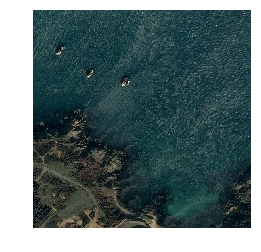

In [57]:
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

print('file_name:',img['file_name'])

# load and display image
I = io.imread('%s/%s/%s'%(dataDir,dataType,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

4 ships.


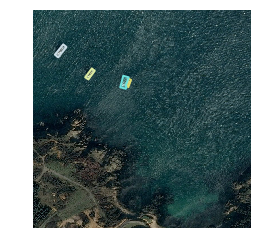

In [58]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
print("%d ships."%len(anns))
coco.showAnns(anns)